# LAB: Titanic

## Step 1 : reading the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

titanic_df = pd.read_csv('C://users/cmrjk/dsi/labs/2.01-lab-pandas-titanic/train.csv')

In [3]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


## Step 2: Cleaning the data

In [6]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install quilt


Note: you may need to restart the kernel to use updated packages.


In [8]:
import quilt
import missingno as msno

 I got help on missingno from here. 
 https://analyticsindiamag.com/tutorial-on-missingno-python-tool-to-visualize-missing-values/

Step2: #1 create a bar chart showing how many missing values are in each column

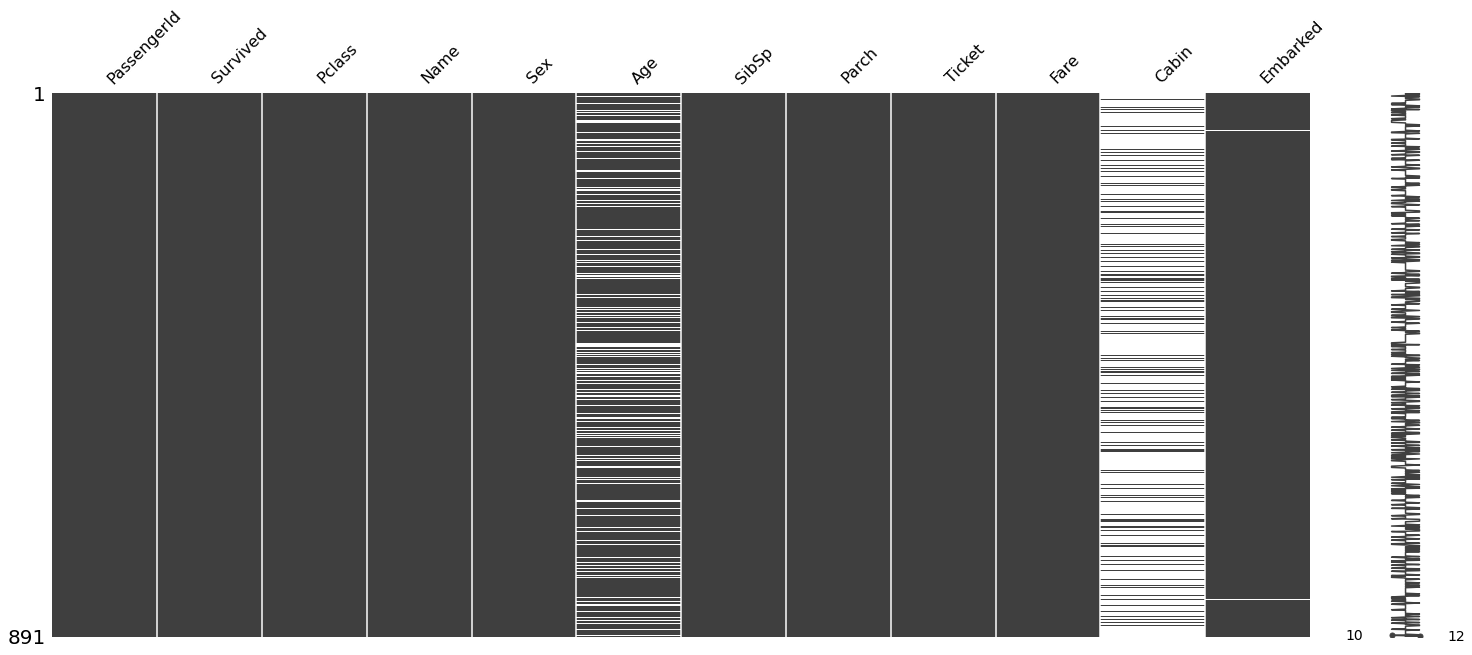

In [9]:
msno.matrix(titanic_df);

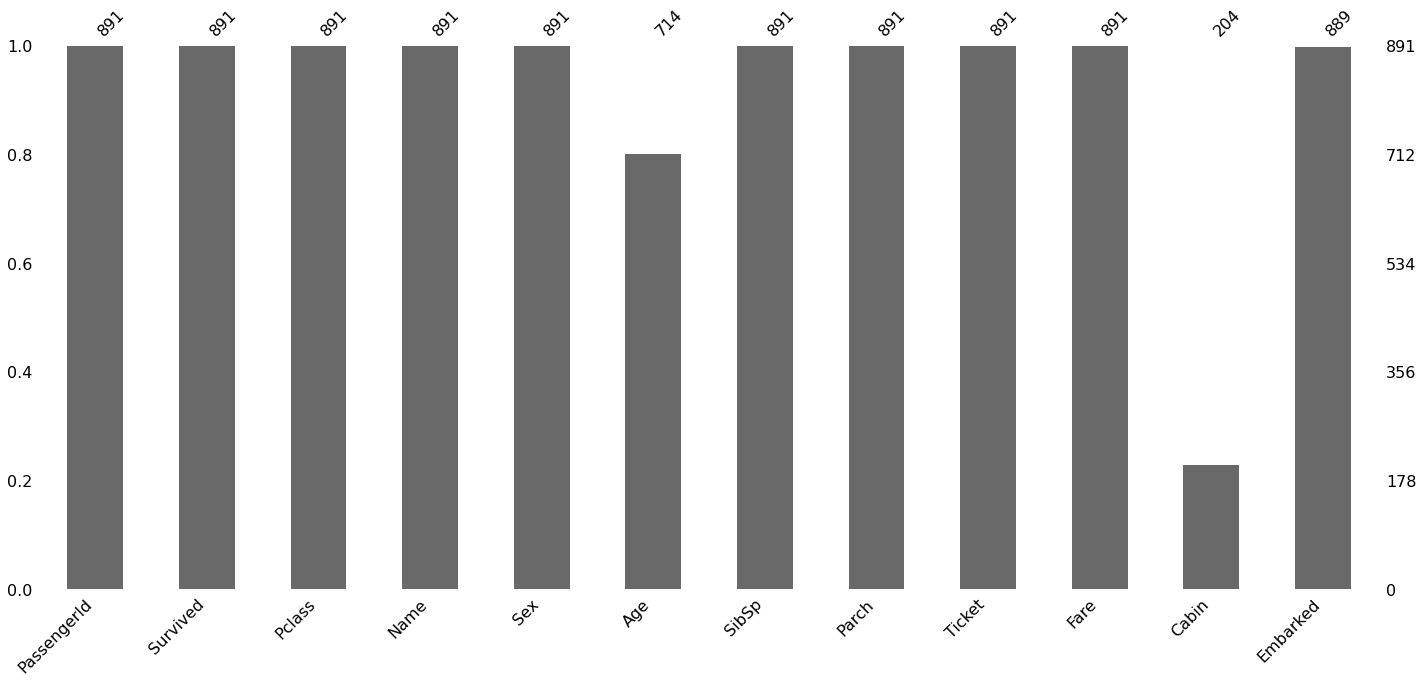

In [10]:
msno.bar(titanic_df);

Step2: #2 
Which column has the most NaN values? 
How many cells in that column are empty?


In [11]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

ANSWER: It is evident that the Cabin column has the most NaN values. 687 cells are empty in that column. 



Step2: #3 Delete all rows where Embarked is empty.


In [12]:
type(titanic_df)

pandas.core.frame.DataFrame

In [13]:
titanic_df.dropna(subset = ['Embarked'], inplace=True)
# 2 rows where embarking location was not listed have been removed.


Recieved assistance from https://www.geeksforgeeks.org/python-pandas-dataframe-fillna-to-replace-null-values-in-dataframe/
and from https://stackoverflow.com/questions/40755680/how-to-reset-index-pandas-dataframe-after-dropna-pandas-dataframe

Step2: #4 Fill all empty cabins with ¯\(ツ)/¯

In [14]:
titanic_df['Cabin'].fillna('¯(ツ)/¯', inplace = True, )

In [15]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        889 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


In [16]:
titanic_df = titanic_df.reset_index(drop=True)
# Index had to be reset because of the removed rows
titanic_df[55:65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
56,57,1,2,"Rugg, Miss. Emily",female,21.0,0,0,C.A. 31026,10.5000,¯(ツ)/¯,S
57,58,0,3,"Novel, Mr. Mansouer",male,28.5,0,0,2697,7.2292,¯(ツ)/¯,C
58,59,1,2,"West, Miss. Constance Mirium",female,5.0,1,2,C.A. 34651,27.7500,¯(ツ)/¯,S
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,¯(ツ)/¯,S
60,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,¯(ツ)/¯,C
61,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1,0,36973,83.4750,C83,S
62,64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,¯(ツ)/¯,S
63,65,0,1,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,¯(ツ)/¯,C
64,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,¯(ツ)/¯,C


# Step 3 : Feature Extraction

Step3: #1 There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called FamilyCount which will be the sum of those two columns.

In [17]:
famcount = []
for i in range(len(titanic_df)):
    famcount.append(titanic_df['SibSp'][i] + titanic_df['Parch'][i])

titanic_df['FamilyCount'] = famcount
titanic_df.head(50)
    

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯(ツ)/¯,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯(ツ)/¯,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯(ツ)/¯,S,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,¯(ツ)/¯,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,¯(ツ)/¯,S,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,¯(ツ)/¯,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,¯(ツ)/¯,C,1


In [18]:
'John' in titanic_df['Name'][1]


True

Step3 #2 Reverends have a special title in their name. Create a column called IsReverend: 1 if they're a preacher, 0 if they're not.

In [19]:

revlist = []

for i in range(len(titanic_df)):

    if 'Rev' in titanic_df['Name'][i]:
        revlist.append(1)
        
    else:
        revlist.append(0)



In [20]:
titanic_df['IsReverand'] = revlist

Step3 #3

In order to feed our training data into a classification algorithm, we need to convert our categories into new columns of 1's and 0's using pd.get_dummies

Familiarize yourself with the pd.get_dummies documentation. 

Create 3 columns: Embarked_C, Embarked_Q and Embarked_S. These columns will have 1's and 0's that correspond to the C, Q and S values in the Embarked column. 

Do the same thing for Sex.

BONUS: Extract the title from everyone's name and create dummy columns!

In [21]:
embarked_col = pd.get_dummies(titanic_df['Embarked'])
embarked_col

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
884,0,0,1
885,0,0,1
886,0,0,1
887,1,0,0


In [22]:
#SEX columns
sex_col = pd.get_dummies(titanic_df['Sex'])
sex_col

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
884,0,1
885,1,0
886,1,0
887,0,1


In [23]:

titles = []


for i in range(len(titanic_df)):  #Here we split the names into lists
    x = titanic_df['Name'][i].split()
    
    for ii in range(len(x)): #iterate through namestring
        if x[ii][-1] == "." and len(x[ii])>2 : 
        #find the item with a period (title)
            titles.append(x[ii])
    

https://www.geeksforgeeks.org/python-get-unique-values-list/#:~:text=Using%20Python%E2%80%99s%20import%20numpy%2C%20the%20unique%20elements%20in,returns%20only%20the%20unique%20values%20in%20the%20list.

I used this to find unique values in a list

In [24]:
def unique(list1): 
      
    # insert the list to the set 
    list_set = set(list1) 
    # convert the set to the list 
    unique_list = (list(list_set)) 
    for y in unique_list: 
        print (y)
        
# This code is directly from geeks for geeks . I only used google.
# I had to see what titles were given, and what modifications to my
# code has to be done. Looks like the title must end with a period
# and be longer than a simple one letter (to take account on initials). 

In [25]:
unique(titles)

Miss.
Mrs.
Mme.
Mlle.
Sir.
Lady.
Dr.
Countess.
Jonkheer.
Master.
Mr.
Major.
Don.
Ms.
Rev.
Capt.
Col.


In [26]:
titles_col = pd.get_dummies(titles)

In [27]:
titanic_df = pd.merge(titanic_df, sex_col, right_index=True, left_index=True)

In [28]:
titanic_df = pd.merge(titanic_df, embarked_col, right_index=True, left_index=True)

In [29]:
titanic_df = pd.merge(titanic_df, titles_col, right_index=True, left_index=True)

In [30]:
titanic_df = titanic_df.drop(['PassengerId', 'Embarked','SibSp','Parch'], axis=1)

In [31]:
titanic_df.T

,0,1,2,3,4,5,6,7,8,9,...,879,880,881,882,883,884,885,886,887,888
Survived,0,1,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,1,0
Pclass,3,1,3,1,3,3,1,3,3,2,...,3,3,2,3,3,2,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry","Moran, Mr. James","McCarthy, Mr. Timothy J","Palsson, Master. Gosta Leonard","Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)","Nasser, Mrs. Nicholas (Adele Achem)",...,"Markun, Mr. Johann","Dahlberg, Miss. Gerda Ulrika","Banfield, Mr. Frederick James","Sutehall, Mr. Henry Jr","Rice, Mrs. William (Margaret Norton)","Montvila, Rev. Juozas","Graham, Miss. Margaret Edith","Johnston, Miss. Catherine Helen ""Carrie""","Behr, Mr. Karl Howell","Dooley, Mr. Patrick"
Sex,male,female,female,female,male,male,male,male,female,female,...,male,female,male,male,female,male,female,female,male,male
Age,22,38,26,35,35,NaN,54,2,27,14,...,33,22,28,25,39,27,19,NaN,26,32
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450,330877,17463,349909,347742,237736,...,349257,7552,C.A./SOTON 34068,SOTON/OQ 392076,382652,211536,112053,W./C. 6607,111369,370376
Fare,7.25,71.2833,7.925,53.1,8.05,8.4583,51.8625,21.075,11.1333,30.0708,...,7.8958,10.5167,10.5,7.05,29.125,13,30,23.45,30,7.75
Cabin,¯(ツ)/¯,C85,¯(ツ)/¯,C123,¯(ツ)/¯,¯(ツ)/¯,E46,¯(ツ)/¯,¯(ツ)/¯,¯(ツ)/¯,...,¯(ツ)/¯,¯(ツ)/¯,¯(ツ)/¯,¯(ツ)/¯,¯(ツ)/¯,¯(ツ)/¯,B42,¯(ツ)/¯,C148,¯(ツ)/¯
FamilyCount,1,1,0,1,0,0,0,4,2,1,...,0,0,0,0,5,0,0,3,0,0
IsReverand,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# Step 4 Exploritory Analysis

S4 #1 What was the survival rate overall?


In [32]:
count = 0

for i in range(len(titanic_df)):
    if titanic_df['Survived'][i] == True:
        count += 1
    
print( f'The overall survival rate is {count/(len(titanic_df))}' )

The overall survival rate is 0.38245219347581555


S4 #2 Which gender fared the worst? What was their survival rate?


In [33]:
mcount = 0
mlive =0
fcount = 0
flive =0   

for ii in range(len(titanic_df)):
    
    if titanic_df['female'][ii] == 1:
        fcount += 1
        if titanic_df['Survived'][ii] == 1:
            flive += 1
            
    elif titanic_df['male'][ii] == 1:
        mcount += 1
        if titanic_df['Survived'][ii] == 1:
            mlive += 1
 

print( f' The survival rate for men was {mlive/mcount}')
print( f'  The survival rate for women was {flive/fcount}')
print('Men fared far worse.')



 The survival rate for men was 0.18890814558058924
  The survival rate for women was 0.7403846153846154
Men fared far worse.


S4 #3 What was the survival rate for each Pclass?


In [34]:
oneclass = 0
oneclasslive = 0
twoclass = 0
twoclasslive = 0
threeclass = 0
threeclasslive = 0

def classsuvival(titanic_df):
    oneclass = 0
    oneclasslive = 0
    twoclass = 0
    twoclasslive = 0
    threeclass = 0
    threeclasslive = 0
    for ii in range(len(titanic_df)):
        if titanic_df['Pclass'][ii] == 1:
            oneclass += 1
            if titanic_df['Survived'][ii] == 1:
                oneclasslive += 1
            
        elif titanic_df['Pclass'][ii] == 2:
            twoclass += 1
            if titanic_df['Survived'][ii] == 1:
                twoclasslive += 1
 
        elif titanic_df['Pclass'][ii] == 3:
            threeclass += 1
            if titanic_df['Survived'][ii] == 1:
                threeclasslive += 1
            
    oneclassrate = oneclasslive/oneclass
    twoclassrate = twoclasslive/twoclass
    threeclassrate = threeclasslive/threeclass
    
    return f'Survival rates by class. First class {oneclassrate} Second Class {twoclassrate} Third Class {threeclassrate}'
 

In [35]:
classsuvival(titanic_df)

'Survival rates by class. First class 0.6261682242990654 Second Class 0.47282608695652173 Third Class 0.24236252545824846'

S4 #4 Did any reverends survive? How many?


In [36]:
revcount = 0

for i in range(len(titanic_df)):
    if titanic_df['IsReverand'][i] == True:
        if titanic_df['Survived'][i] == True:
            revcount += 1
revcount

0

S4 #5 What is the survival rate for cabins marked  ¯\(ツ)/¯ ?

In [37]:
cabincount = 0
cabincountlive = 0
for i in range(len(titanic_df)):
    if '¯(ツ)/¯' in titanic_df['Cabin'][i]:
        cabincount += 1
        if titanic_df['Survived'][i] == True:
            cabincountlive += 1

print(f'The survival rate for unknown cabins is {cabincountlive/cabincount}')

The survival rate for unknown cabins is 0.29985443959243085


S4 #6 What is the survival rate for people whose Age is empty?

In [38]:
ageempty =0 
agelive = 0
for i in range(len(titanic_df)):
    if pd.isnull( titanic_df['Age'][i] ):
        ageempty += 1
        if titanic_df['Survived'][i] == True:
            agelive += 1
agelive/ageempty

0.2937853107344633

S4 #7 What is the survival rate for each port of embarkation?


In [39]:
ccount = 0
ccountlive =0
scount = 0 
scountlive = 0
qcount = 0
qcountlive =0

for i in range(len(titanic_df)):
    
    if titanic_df['S'][i] == True:
        scount += 1
        if titanic_df['Survived'][i] == True:
            scountlive += 1
            
    elif titanic_df['C'][i] == True:
        ccount += 1
        if titanic_df['Survived'][i] == True:
            ccountlive += 1
            
    elif titanic_df['Q'][i] == True:
        qcount += 1
        if titanic_df['Survived'][i] == True:
            qcountlive += 1
            
print(f' Queenstown survival rate is {qcountlive/qcount}. \n',
      f'Cherbourg survival rate is {ccountlive/ccount}. \n',
      f'Southampton survival rate is {scountlive/scount}.'
      )

 Queenstown survival rate is 0.38961038961038963. 
 Cherbourg survival rate is 0.5535714285714286. 
 Southampton survival rate is 0.33695652173913043.


S4 #8 What is the survival rate for children (under 12) in each Pclass?

In [40]:
kidclass1=0
kidclass2=0
kidclass3=0
kidclass1live=0
kidclass2live=0
kidclass3live=0

for i in range(len(titanic_df)):
    
    if titanic_df['Age'][i] < 12:
        
        if titanic_df['Pclass'][i] == 1:
            kidclass1 += 1
            if titanic_df['Survived'][i] == True:
                kidclass1live += 1
        
        elif titanic_df['Pclass'][i] == 2:
            kidclass2 += 1
            if titanic_df['Survived'][i] == True:
                kidclass2live += 1
        
        elif titanic_df['Pclass'][i] ==3:
            kidclass3 += 1
            if titanic_df['Survived'][i] == True:
                kidclass3live += 1

kidrate1 = kidclass1live/kidclass1
kidrate2 = kidclass2live/kidclass2
kidrate3 = kidclass3live/kidclass3

print(f' Survival Rates for kids under 12 years old by passenger class. \n '
      f' first class {kidrate1} \n '
      f' second class {kidrate2} \n '
      f' third class {kidrate3}. '
     )

 Survival Rates for kids under 12 years old by passenger class. 
  first class 0.75 
  second class 1.0 
  third class 0.40425531914893614. 


S4 #9 Did the captain of the ship survive? Is he on the list?


In [41]:
for i in range(len(titanic_df)):
    if 'Smith' in titanic_df['Name'][i]:
        print( titanic_df['Name'][i])

Smith, Mr. James Clinch
Smith, Mr. Thomas
Smith, Mr. Richard William
Smith, Miss. Marion Elsie


Captain Edward Smith is not on this list. However it is well known that he stayed on the ship and adhered to a maritime tradition that a sea captain is held ultimate responsibility for both his ship and everyone embarked on it, and that in an emergency, he will either save them or die onboard. It is unclear if he drowned or shot himself.  

S4 #10 Of all the people that died, who had the most expensive ticket? How much did it cost?

In [42]:
m_ticket = 0

for i in range(len(titanic_df)):
    if titanic_df['Survived'][i] == False:
        if titanic_df['Fare'][i] > m_ticket:
            m_ticket = titanic_df['Fare'][i]
            
m_ticket

263.0

S4 #11 Does having family on the boat help or hurt your chances of survival?

In [43]:
p_withfam = 0 
p_withfamlive = 0

for i in range(len(titanic_df)):
    if titanic_df['FamilyCount'][i] > 0:
        p_withfam += 1
        if titanic_df['Survived'][i] == True:
            p_withfamlive += 1
        
p_withfamlive/p_withfam

0.5056497175141242

# Step 5: Plotting

Using Matplotlib and Seaborn, create several charts showing the survival rates of different groups of people. It's fine if a handful of charts are basic (Gender, Age, etc), but what we're really looking for is something beneath the surface.